In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imageio

In [3]:
# read data into multiple Dataframes (limit rows for fert & life as files contain erroneous rows)
fert = pd.read_csv('../data/gapminder_total_fertility.csv', index_col=0, nrows = 258)
life = pd.read_excel('../data/gapminder_lifeexpectancy.xlsx', index_col=0, nrows = 258)
population = pd.read_excel('../data/gapminder_population.xlsx', index_col=0)
conts = pd.read_csv('../data/continents.csv', index_col=0, sep=';')

In [4]:
# check shape of Dataframes
print(life.shape, fert.shape, population.shape, conts.shape)

(258, 217) (258, 216) (275, 81) (194, 1)


In [5]:
# the datatype of life is float, 
print(f"""life: {life.columns.dtype}, fert: {fert.columns.dtype}, population: {population.columns.dtype}, 
conts: {conts.columns.dtype}""")

life: float64, fert: object, population: float64, 
conts: object


In [6]:
# change all numeric columns to integers
life.columns = life.columns.astype(int)
fert.columns = fert.columns.astype(int)
population.columns = population.columns.astype(int)

In [7]:
# check the indexes
fert.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'West Germany', 'Western Sahara', 'Vietnam', 'Virgin Islands (U.S.)',
       'North Yemen (former)', 'South Yemen (former)', 'Yemen', 'Yugoslavia',
       'Zambia', 'Zimbabwe'],
      dtype='object', name='Total fertility rate', length=258)

In [8]:
# change index name from Total Fertility rate to country and reset index
fert.index.name = 'country'
fert = fert.reset_index()
fert

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,South Yemen (former),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,Yemen,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,...,5.20,5.01,4.83,4.66,4.50,4.35,4.21,4.08,3.95,3.83
255,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,5.93,5.91,5.88,5.85,5.81,5.77,5.73,5.69,5.64,5.59


In [9]:
# change fert Dataframe from wide to long format
fert_long = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')
fert_long

,country,year,fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
...,...,...,...
55723,South Yemen (former),2015,NaN
55724,Yemen,2015,3.83
55725,Yugoslavia,2015,NaN
55726,Zambia,2015,5.59


In [10]:
# change index name for life expectancy to country and add numerical index
life.index
life.index.name = 'country'
life = life.reset_index()
life

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,South Yemen (former),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,Yemen,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,...,65.2,65.7,66.2,66.6,66.6,66.7,67.1,67.1,66.0,64.92
255,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,49.0,51.1,52.3,53.1,53.7,54.7,55.6,56.3,56.7,57.10


In [11]:
# change life to long format
life_long = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')
life_long

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82
...,...,...,...
55981,South Yemen (former),2016,NaN
55982,Yemen,2016,64.92
55983,Yugoslavia,2016,NaN
55984,Zambia,2016,57.10


In [12]:
# change name of index to country
population.index.name = 'country'
# reset the index
population = population.reset_index()
population

,country,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
4,Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Northern Marianas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,South Georgia and the South Sandwich Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,US Minor Outlying Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# bring population in long-format
population_long = population.melt(id_vars='country', var_name='year', value_name='population')
population_long

,country,year,population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,410445.0
4,Algeria,1800,2503218.0
...,...,...,...
22270,Northern Marianas,2015,NaN
22271,South Georgia and the South Sandwich Islands,2015,NaN
22272,US Minor Outlying Islands,2015,NaN
22273,Virgin Islands,2015,NaN


In [14]:
# changing the order of conts
conts = conts.reset_index()
conts = conts[['country','continent']]
# rename Australia and Oceania as name is too long
conts['continent'].loc[conts['continent'] == 'Australia and Oceania'] = 'Australia & Oc.'

In [15]:
# Drop all NaN values
population_long.dropna(inplace=True)
life_long.dropna(inplace=True)
fert_long.dropna(inplace=True)
conts.dropna(inplace=True)
conts

,country,continent
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina,Africa
...,...,...
189,Paraguay,South America
190,Peru,South America
191,Suriname,South America
192,Uruguay,South America


In [16]:
# merge the dataframes
df = pd.merge(fert_long, population_long, how="inner", on=["country", "year"])
df = pd.merge(df, life_long, how="inner", on=["country", "year"])
df = pd.merge(df, conts, how="inner", on="country")
df['population'] = df['population'] / 1000000
df['life_expectancy'].describe()

count    13446.000000
mean        57.132785
std         15.917859
min          4.000000
25%         44.492500
50%         60.475000
75%         70.700000
max         83.300000
Name: life_expectancy, dtype: float64

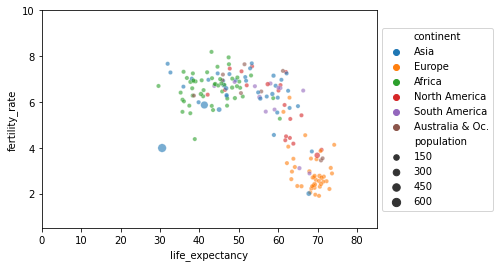

In [17]:
# create a scatterplot of year 2000
df_subset = df.loc[df['year'] == 1960]
plt.axis((0, 85, 0.5, 10))
g = sns.scatterplot(data=df_subset, x='life_expectancy', y='fertility_rate', hue='continent', 
    size='population', alpha=0.6, legend='brief')
g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [27]:
# save a scatterplot to .png for each year 
for year in range(1950, 2016):
    # set the axis to contain all min and max values
    plt.axis((10, 85, 0.5, 10))
    plt.title(str(year))
    # create a subset for each year and draw a scatterplot
    df_subset = df.loc[df['year'] == year]
    sns.scatterplot(data=df_subset, x='life_expectancy', y='fertility_rate', hue='continent', 
        size='population', sizes=(5, 210), size_norm=(0, 1400), alpha=0.6)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    # label the countries of the marked countries list
    labelled_countries = ['China', 'India', 'Germany', 'United States', 'Nigeria', 'Cambodia', 
        'Afghanistan', 'Mali']
    for country in labelled_countries:
        mask_label = (df['country'] == country) & (df['year'] == year)
        plt.text(x=df['life_expectancy'].loc[mask_label], y=df['fertility_rate'].loc[mask_label], 
            s=country)
    # save the scatterplot (bbox_inches to tight to not cut off the legend)
    filename = '../data/scatterplot_files/lifeexp_' + str(year) + '.png'
    plt.savefig(filename, dpi=200, bbox_inches='tight')
    plt.close()


In [21]:
# create a list of images and create with them the animated scatterplot as gif
path = '../data/scatterplot_files/'
images = [imageio.imread(path + 'lifeexp_{}.png'.format(year)) for year in range(1950, 2016)]
imageio.mimsave('animation.gif', images, fps=10)

In [26]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel',